In [71]:
include("src/TopologicalProperties.jl")
include("src/Entanglement_spectrum.jl")
include("src/Fidelity.jl")
using Plots
using LaTeXStrings
using Statistics

LoadError: LoadError: SystemError: opening file "c:\\Users\\basil\\Documents\\EPFL\\Master\\MasterProject\\Code\\DMRG\\src\\src\\Entanglement_spectrum.jl": No such file or directory
in expression starting at c:\Users\basil\Documents\EPFL\Master\MasterProject\Code\DMRG\src\Fidelity.jl:5

## Parameters to selects the files

In [72]:
# Root Pattern 
setRP = [[2,2,1,1]]

#Length in x-direction 
Lmin = 17. 
Lmax = 17.
Nstep = 1

#Angle parameter
θmin = -0.25
θmax = 0.1
Nθ = 36

#Bond dimension
χmax = 512 
χ = 512

#Type of interaction 
typeInt = "2b_3b"

setL = LinRange(Lmin, Lmax, Nstep)
setθ = LinRange(θmin, θmax, Nθ)


println("
Parameters are : \n
L_min = $Lmin,
L_max = $Lmax,
step = $(step(setL)),
##########\n
θ_min = $θmin
θ_max = $θmax
dθ = $(step(setθ))
##########\n
χ max = $χmax
χ = $χ
")


Parameters are : 

L_min = 17.0,
L_max = 17.0,
step = 0.0,
##########

θ_min = -0.25
θ_max = 0.1
dθ = 0.01
##########

χ max = 512
χ = 512



### Loading data

In [73]:
function LoadData(RootPattern::Vector{Int64}, setMeasure::LinRange{Float64, Int64}, FixParam::Float64, χmax::Int64, χ::Int64, type::String, measure::String; maxIters=100, noise=0.0)
    DictR = Dict()
    path = "Data/TransitionInfiniteCylinder/2b_3b/"

    
    setE = []
    setPsi = Array{InfiniteCanonicalMPS}(undef, length(setMeasure))
    setErr =[]
    setEntr =[]
    
    for (ind, Meas) in enumerate(setMeasure)
        front = "rp$(RootPattern_to_string(RootPattern))_chiMax$(χmax)_"
        midName  = measure == "DT" ?  "Ly$(round(Meas, digits=5))_theta$(round(FixParam, digits=5))" : "Ly$(round(FixParam, digits=5))_theta$(round(Meas, digits=5))"
        endName = "_maxiters$(maxIters)_chi$(χ)_alpha$(noise).jld2"
        
        openName = path*front*midName*endName
        
        el = measure == "DT" ? "L" : "θ" 
        println("Loading $el = $(round(Meas, digits=5))")
        flush(stdout)
            
        jldopen(openName, "r") do file
            setPsi[ind] = file["dmrgStruct"].ψ
            append!(setE, file["energies"][end])
            append!(setErr,file["errors"])
            append!(setEntr, file["entropies"][end])
        end
        
    end
    
    DictR["Psi"] = setPsi
    DictR["Energy"] = setE
    DictR["Errors"] = setErr
    DictR["Entropy"] = setEntr

    return DictR
end;


In [74]:
setData = Array{Dict}(undef, length(setRP))

for (ind, rp) in enumerate(setRP)
    if Nstep != 1
        setData[ind] = LoadData(rp, setL, setθ[1], χmax, χ, typeInt, "DT")
    else
        
        setData[ind] = LoadData(rp, setθ, setL[1], χmax, χ, typeInt, "PP")
    end

    println("Sucessfuly load the data")
end

Loading θ = -0.25


Loading θ = -0.24


Loading θ = -0.23


Loading θ = -0.22
Loading θ = -0.21


Loading θ = -0.2


Loading θ = -0.19


Loading θ = -0.18


Loading θ = -0.17


Loading θ = -0.16


Loading θ = -0.15


Loading θ = -0.14


Loading θ = -0.13


Loading θ = -0.12


Loading θ = -0.11


Loading θ = -0.1


Loading θ = -0.09


Loading θ = -0.08


Loading θ = -0.07


Loading θ = -0.06


Loading θ = -0.05


Loading θ = -0.04


Loading θ = -0.03


Loading θ = -0.02


Loading θ = -0.01


Loading θ = 0.0


Loading θ = 0.01


Loading θ = 0.02


Loading θ = 0.03


Loading θ = 0.04


Loading θ = 0.05


Loading θ = 0.06


Loading θ = 0.07


Loading θ = 0.08


Loading θ = 0.09


Loading θ = 0.1


Sucessfuly load the data


## Entanglement spectrum

In [75]:
function plot_entanglement_spectrum(psi, Meas, L)
  l = @layout [a b; c d]
  D = compute_entanglement_spectrum(psi)
  p = []
  
  c = reverse(palette(:rainbow))

  for i=1:4

  N=0
  if i == 1
    N = 2
  elseif i == 2
    N = 4
  elseif i==3 
    N = 2
  end 

  E = Sector_Entanglement_Spectrum(D[i], N)

  push!(p, scatter(E["K"], E["Eta"], marker=:hline, markersize=5, linewidth=4, color=c[i], title="sector $(i-1)", primary=false, xlabel=L"$K$", ylabel=L"$\eta$"))
  end 
  
  fig = plot(p..., layout=l, title=L"$\theta$"*"= $(round(Meas, digits=3))")
  display(fig)

  namesave = "FiguresNew/EntSpec_Ly$(L)_chi$(χ)_theta$(Meas)"
  
  Plots.png(fig, namesave)
  Plots.pdf(fig, namesave)

end;

In [76]:
function plotAllEntPhase()
    setPsi = setData[1]["Psi"]
    for (ind, θ) in enumerate(setθ)
        plot_entanglement_spectrum(setPsi[ind], θ)
    end
end;

function plotAllEntLength()
    setPsi = setData["Psi"]
    for (ind, L) in enumerate(setL)
        plot_entanglement_spectrum(setPsi[ind], L)
    end
end;

function plotReprPhase(setIndex, L::Float64)
    setPsi = setData[1]["Psi"]
    for ind in setIndex
        plot_entanglement_spectrum(setPsi[ind], setθ[ind], L)
    end
end;
  

plotReprPhase (generic function with 2 methods)

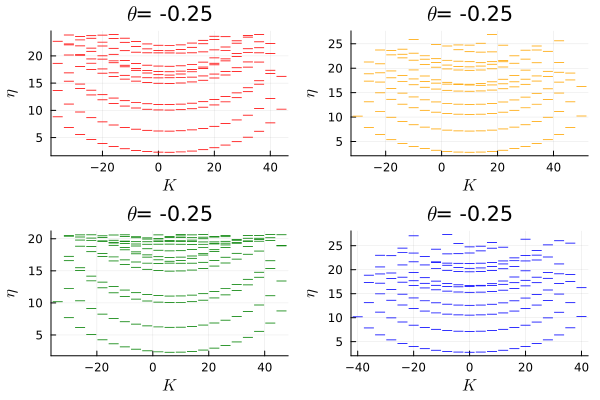

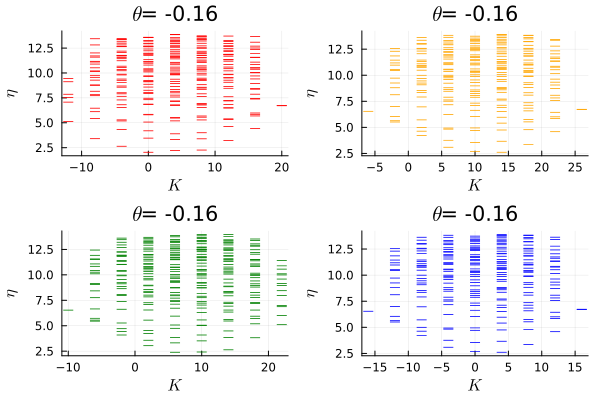

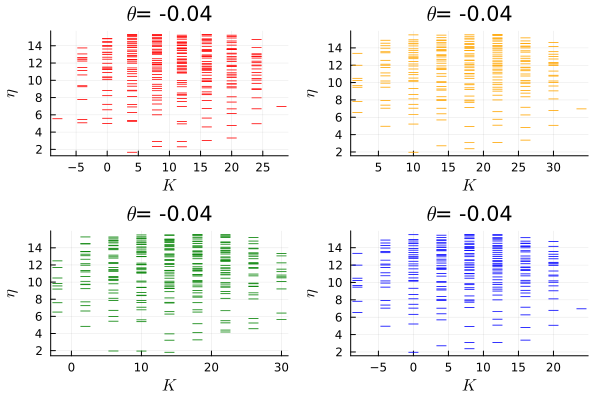

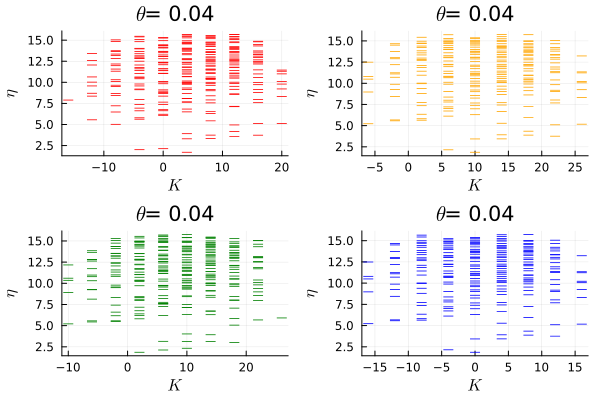

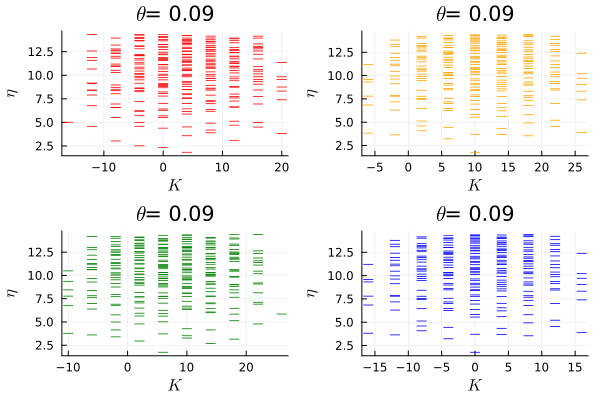

In [77]:
setIndex = [1, 10, 22, 30, 35]
plotReprPhase(setIndex, setL[1])

## Phase portrait

In [78]:
function Energy(L)
    
    setE = setData[1]["Energy"]
    


    fig= plot()

    scatter!(fig, setθ, setE, label="Energy", marker=:circle, markersize=5, color=RGB(0., 0.56, 0.))
    xlabel!(fig, L"\theta")
    ylabel!(fig, L"E")
    title!(fig, "Energy for Ly=$(L) and χ=$(χ)")
    #vline!([n*pi/4 for n=3:4:8])
    
    
    namesave = "FiguresNew/Energy_Ly$(L)_chi$(χ)_tmin$(first(setθ))_tmax$(last(setθ))"
    Plots.png(fig, namesave)
    Plots.svg(fig, namesave)
    Plots.pdf(fig, namesave)
    
    display(fig)
end


function Entropy(L)
    
    setE = setData[1]["Entropy"]
    


    fig= plot()

    scatter!(fig, setθ, setE, label="Entropy", marker=:circle, markersize=5, color=RGB(0., 0.56, 0.))
    xlabel!(fig, L"\theta")
    ylabel!(fig, L"S")
    title!(fig, "Energy for Ly=$(L) and χ=$(χ)")
    #vline!([n*pi/4 for n=3:4:8])
    
    
    namesave = "FiguresNew/Entropy_Ly$(L)_chi$(χ)_tmin$(first(setθ))_tmax$(last(setθ))"
    Plots.png(fig, namesave)
    Plots.svg(fig, namesave)
    Plots.pdf(fig, namesave)
    
    display(fig)
end



function Fidelity()



end

ErrorException: syntax: incomplete: premature end of input

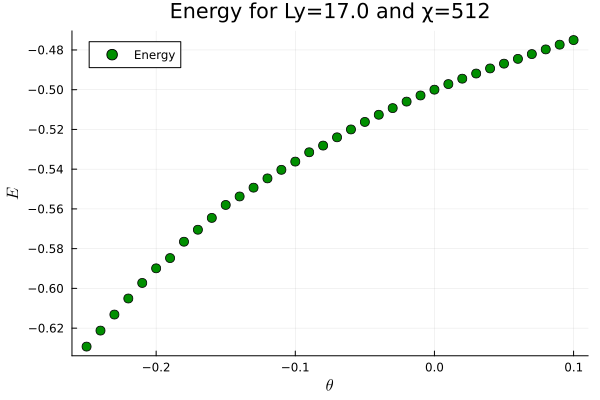

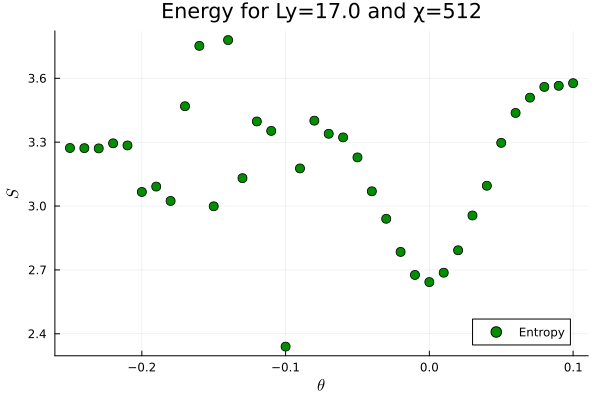

In [79]:
Energy(setL[1])
Entropy(setL[1])